# Lab | Principal Component Analysis

### Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [24]:
# Run this code:

%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [25]:
# Run this code

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [26]:
# Your code here:
# Print the shape of the cats array
print("Shape of 'cats' array:", cats.shape)

# Print the shape of the dogs array
print("Shape of 'dogs' array:", dogs.shape)

Shape of 'cats' array: (4096, 80)
Shape of 'dogs' array: (4096, 80)


What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [27]:
# Your code here:

# Print the first image (column 0) from the cats array
print("First cat image pixel values:\n", cats[:, 0])

First cat image pixel values:
 [64 64 64 ... 64 64 61]


Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

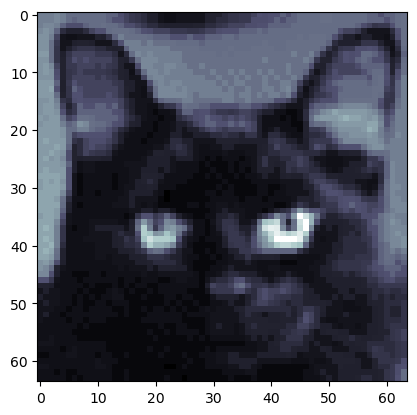

In [28]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(cats[:,3].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

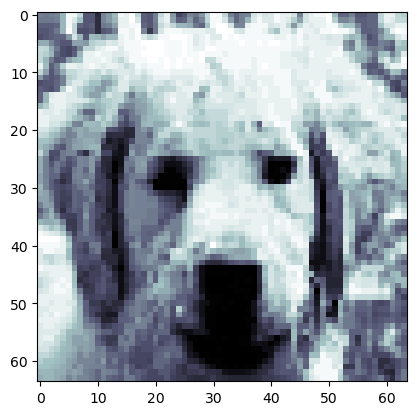

In [29]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(dogs[:,1].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

In [30]:
np.mean(cats[:,0])

np.float64(58.609619140625)

In [31]:
cats.mean(axis=0)
cats.std(axis=0)

array([63.54083483, 55.05342948, 96.22107579, 42.96377137, 57.44792378,
       62.28054978, 55.96826821, 51.26000622, 68.82531752, 76.29355816,
       48.29057502, 54.21961926, 67.51638493, 56.29031737, 62.82928068,
       30.60020122, 52.19689948, 54.52922013, 52.65832792, 54.14346961,
       57.05866927, 75.27339483, 59.20283723, 53.44195459, 72.82675848,
       55.36435344, 47.36381225, 64.4733204 , 51.92344127, 47.11854814,
       44.34041057, 76.55561069, 61.80528646, 90.00324777, 47.67908897,
       46.27695643, 66.93139964, 55.19650491, 57.64545781, 48.69005024,
       46.5723875 , 80.41545184, 60.69968994, 42.82566719, 76.36164843,
       33.41360207, 34.24949367, 74.99337283, 68.55681551, 35.98625387,
       66.78793345, 42.49268605, 56.2258237 , 62.65667469, 45.97060977,
       43.58760589, 84.51332964, 47.18754976, 49.94796429, 49.77835516,
       38.49131949, 38.81452789, 57.88293925, 57.74085803, 62.90148866,
       51.96500362, 65.83188896, 57.8063361 , 33.3196815 , 54.49

In [32]:
def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    
    # Your code here:

    # 1. Calculate the mean of each column (each image)
    mean_values = np.mean(x, axis=0)

    # 2. Calculate the standard deviation of each column
    std_values = np.std(x, axis=0)

    # 3. Subtract the mean from each value in its column
    # Then, divide by the standard deviation for that column
    standardized_x = (x - mean_values) / std_values
    
    # 4. Return the final standardized array
    return standardized_x

standardize(np.array([[1,2,3],[4,5,6]]))

array([[-1., -1., -1.],
       [ 1.,  1.,  1.]])

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [33]:
# Your code here:
# 'axis=1' means put them side-by-side (add the columns together).
combined_data = np.concatenate((dogs, cats), axis=1)


# Let's check the shape to make sure it worked correctly.
# It should be (4096, 160) -> 4096 pixels, 160 images (80 dogs + 80 cats).
print("Shape of combined data:", combined_data.shape)

Shape of combined data: (4096, 160)


Standardize the concatenated array below.

In [34]:
# Your code here:

standardized_data = standardize(combined_data)


# Let's check the result for one image to see if it worked.
# Print the mean and standard deviation of the first image (first column)
print("Mean of first image after standardization:", np.mean(standardized_data[:, 0]))
print("Std of first image after standardization:", np.std(standardized_data[:, 0]))

Mean of first image after standardization: -2.7755575615628914e-17
Std of first image after standardization: 1.0


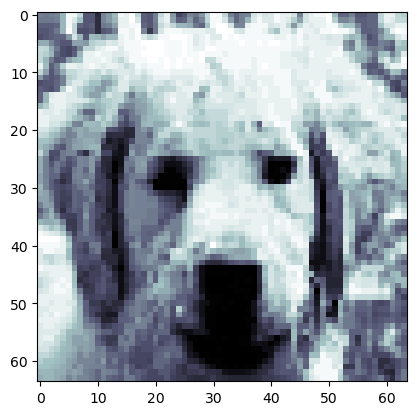

In [35]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(standardized_data[:,1].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

## Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [36]:
# Your code here:

# First, import the PCA function from the statsmodels library
from statsmodels.multivariate.pca import PCA

# Create a PCA model object. We tell it to standardize=False because we already did it ourselves!

pca_model = PCA(standardized_data, standardize=False, ncomp=2)

# The PCA model has now been fitted to our data.
# Let's see what it found. The 'factors' are the main patterns (components).
print("Shape of PCA factors:", pca_model.factors.shape)

Shape of PCA factors: (4096, 2)


Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

In [37]:
# Your code here:

# Transpose (flip rows and columns) the standardized data
# This changes the shape from (4096, 160) to (160, 4096)
data_transposed = standardized_data.T

print("Shape of transposed data:", data_transposed.shape)



Shape of transposed data: (160, 4096)


Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [38]:
# Your code here:

# Calculate the dot product: (160, 4096) dot (4096, 2) = (160, 2)
# This creates the 2D projection (the scores for each image on the two main components).
projection_2d = np.dot(data_transposed, pca_model.factors)

# Check the shape of the result. It should be (160, 2).
print("Shape of the 2D projection:", projection_2d.shape)

Shape of the 2D projection: (160, 2)


In [39]:
transposed_std = standardized_data.T

In [40]:
from sklearn.decomposition import PCA

# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit(transposed_std)

pca_2nd_factors = X_pca_2d.components_


In [41]:
pca_2nd_factors.shape

(2, 4096)

In [42]:
# Calculate the dot product: (160, 4096) dot (4096, 2) = (160, 2)
# This creates the 2D projection (the scores for each image on the two main components).
projection_2d_2 = np.dot(data_transposed, pca_2nd_factors.T)

# Check the shape of the result. It should be (160, 2).
print("Shape of the 2D projection:", projection_2d.shape)

Shape of the 2D projection: (160, 2)


## Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [43]:
# Your code here:

# Turn the 2D projection array into a pandas DataFrame for easier handling
# Name the columns 'pc1' and 'pc2'
pca_df = pd.DataFrame(projection_2d, columns=['pc1', 'pc2'])

# Let's see the first few rows to understand what we created
display(pca_df.head())

,pc1,pc2
0,-42.477618,14.718214
1,-32.188707,-19.266296
2,12.963227,-18.021975
3,-5.083062,-32.955571
4,-32.866232,4.119687


In [44]:
# Create a DataFrame with PCA results
projection_2d_2_df = pd.DataFrame(data=projection_2d_2, columns=['pc1', 'pc2'])
# pca_df['species'] = pd.Categorical.from_codes(y, target_names)

# print("Original data shape:", standardized_data.shape)
# print("Transformed data shape:", X_pca_2d.shape)
# print("\nVariance explained by each component:")
# print(f"PC1: {pca_2d.explained_variance_ratio_[0]:.2%}")
# print(f"PC2: {pca_2d.explained_variance_ratio_[1]:.2%}")
# print(f"Total variance explained: {sum(pca_2d.explained_variance_ratio_):.2%}")

In [45]:
projection_2d_2_df

,pc1,pc2
0,42.413683,16.534457
1,32.366439,-16.586335
2,-12.766179,-14.099740
3,5.325394,-31.687940
4,32.868538,5.436775
...,...,...
155,-26.732217,-17.716136
156,-32.788549,-23.993388
157,-45.628176,-14.292579
158,17.165461,-0.570099


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [46]:
# Your code here:

# Create a list of 160 color names.
# The first 80 elements are 'blue' for dogs.
# The last 80 elements are 'red' for cats.
colors = ['blue'] * 80 + ['red'] * 80

# Let's check the length and the first/last few elements
print("Length of colors list:", len(colors))
print("First 5 colors:", colors[:5])
print("Last 5 colors:", colors[-5:])


Length of colors list: 160
First 5 colors: ['blue', 'blue', 'blue', 'blue', 'blue']
Last 5 colors: ['red', 'red', 'red', 'red', 'red']


Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

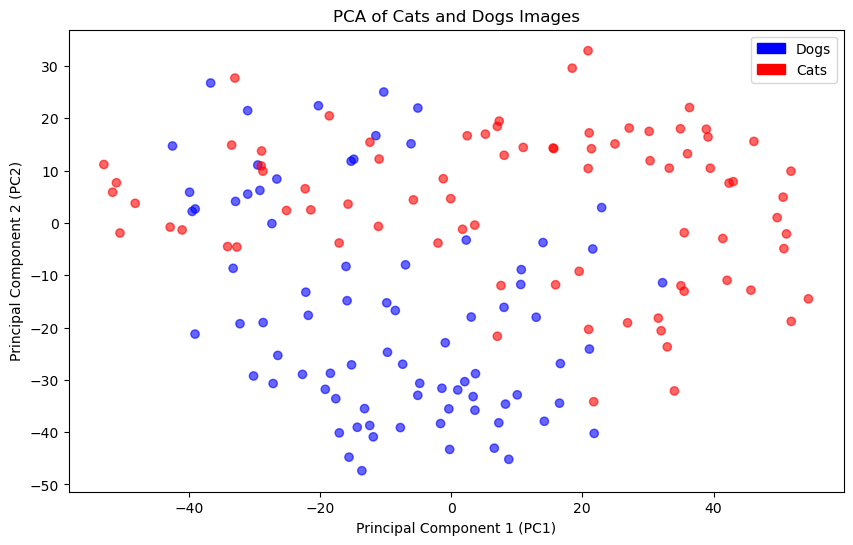

In [47]:
# Your code here:

# Create a figure
plt.figure(figsize=(10, 6))

# Create the scatter plot
# c=colors: This is the command to color each point based on our list
plt.scatter(pca_df['pc1'], pca_df['pc2'], c=colors, alpha=0.6) # alpha makes points slightly see-through

# Add labels and a title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Cats and Dogs Images')

# Add a legend (a little tricky without direct legend support in scatter)
# We can create proxy artists for the legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Dogs')
red_patch = mpatches.Patch(color='red', label='Cats')
plt.legend(handles=[blue_patch, red_patch])

# Show the plot
plt.show()

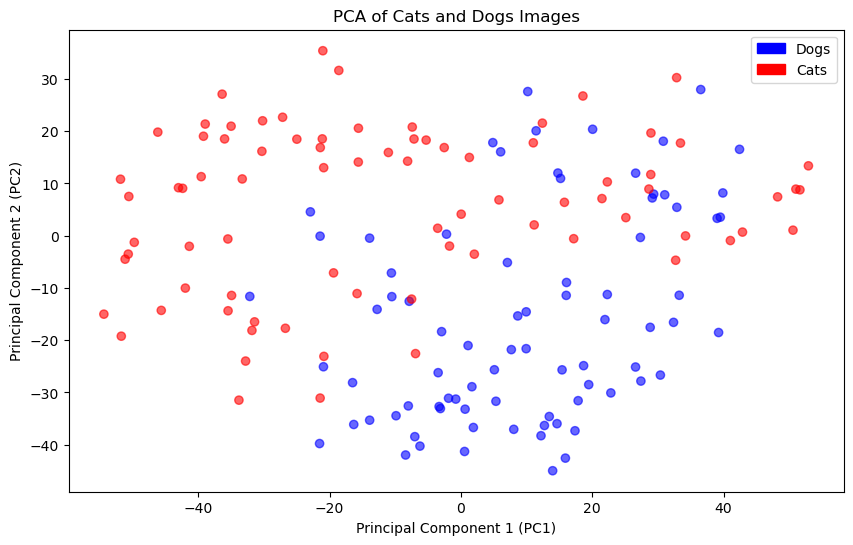

In [48]:
# Your code here:

# Create a figure
plt.figure(figsize=(10, 6))

# Create the scatter plot
# c=colors: This is the command to color each point based on our list
plt.scatter(projection_2d_2_df['pc1'], projection_2d_2_df['pc2'], c=colors, alpha=0.6) # alpha makes points slightly see-through

# Add labels and a title
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA of Cats and Dogs Images')

# Add a legend (a little tricky without direct legend support in scatter)
# We can create proxy artists for the legend
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Dogs')
red_patch = mpatches.Patch(color='red', label='Cats')
plt.legend(handles=[blue_patch, red_patch])

# Show the plot

Do you see a clear separation between cats and dogs? Write your answer below.

In [49]:
# Your conclusions here:

# The PCA projection shows a partial separation between dogs (blue) and cats (red).
# The data is not perfectly separable, but a general trend is visible, often along a diagonal axis.

# This means that the two main patterns found by PCA (PC1 and PC2) contain some information
# that is useful for distinguishing between cats and dogs.

# However, the significant overlap, especially with many dogs appearing in the "cat" region,
# indicates that these two components alone are not enough to perfectly classify all images.
# There is still a lot of variation and confusion, meaning more complex features or more
# principal components would be needed to build a highly accurate model.

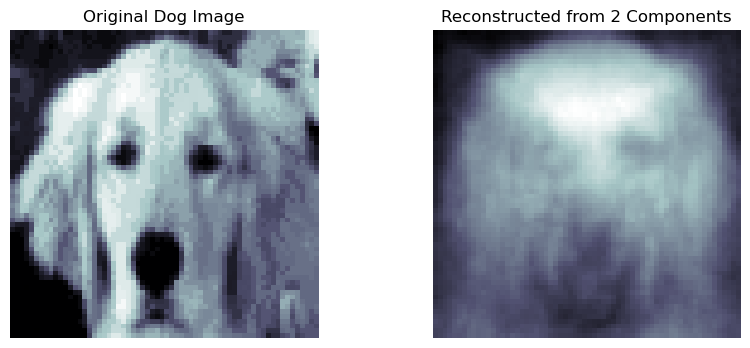

In [50]:
# Let's reconstruct the first dog (which is at index 0 in our projection_2d array)
image_index = 10

# 1. Get the scores for this specific image from our projection
# These are the two numbers we plotted for the first point
scores = projection_2d[image_index] # This is a array like [score_pc1, score_pc2]

# 2. Get the patterns (components) from the PCA model
# pca_model.factors has a shape of (4096, 2)
patterns = pca_model.factors

# 3. Reconstruct the image by calculating the weighted sum of the patterns.
# This is the reverse of the dot product we did earlier.
# reconstructed_image = (score_pc1 * pattern_pc1) + (score_pc2 * pattern_pc2)
reconstructed_image = (scores[0] * patterns[:, 0]) + (scores[1] * patterns[:, 1])

# reconstructed_image is now a vector of 4096 pixels, just like the original.
# But it will look blurry because we only used 2 patterns.

# 4. Let's plot the reconstructed image next to the original for comparison.

# Get the original image. Remember, our 'data_transposed' has the standard format (samples, features).
# So the first dog is at data_transposed[0]
original_image = data_transposed[image_index] # This gets the 4096 pixels for the first dog

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the Original Image
ax1.imshow(original_image.reshape(64, 64).T, cmap=plt.cm.bone)
ax1.set_title('Original Dog Image')

# Plot the Reconstructed Image from 2 PCs
ax2.imshow(reconstructed_image.reshape(64, 64).T, cmap=plt.cm.bone)
ax2.set_title('Reconstructed from 2 Components')

# Remove axis ticks for a cleaner look
ax1.axis('off')
ax2.axis('off')

plt.show()